In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

In [2]:
random_state("rng_states/experiment2.npy")

In [3]:
S = [1.] * 8
d = len(S)
x_min = -np.pi
x_max = np.pi

targets = [(-5, -5), (0, -5), (5, -5), (5, 0), (5, 5), (0, 5), (-5, 5), (-5, 0), (-5, -5)]
T = len(targets)
rectangles = [((-4, -4), (-2, -2)), ((-1, -4), (1, -2)), ((2, -4), (4, -2)),
              ((-4, -1), (-2, 1)), ((2, -1), (4, 1)),
              ((-4, 2), (-2, 4)), ((-1, 2), (1, 4)), ((2, 2), (4, 4))]
rectangle_lists = [rectangles] * T

objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 400
alpha_inf = 0.8
n_immigrants = 200
eta_c = 3.
eta_m = 30.
p_c = 0.9
p_m = 0.1
num_iterations_init = 120
num_iterations = 80

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 80, best: [4.67567324], #infeasible: 320, best: [2.31517469 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 80, best: [0.41414031], #infeasible: 320, best: [4.20901423e-04 1.00000000e+00]
Iteration 40, #feasible: 80, best: [0.00865598], #infeasible: 320, best: [1.17647212e-05 1.00000000e+00]
Iteration 60, #feasible: 80, best: [4.72297389e-06], #infeasible: 320, best: [4.46494351e-07 1.00000000e+00]
Iteration 80, #feasible: 80, best: [2.52695149e-07], #infeasible: 320, best: [4.63269487e-08 1.00000000e+00]
Iteration 100, #feasible: 80, best: [1.34369429e-07], #infeasible: 320, best: [2.3262074e-10 1.0000000e+00]
Iteration 119, #feasible: 80, best: [2.82957032e-08], #infeasible: 320, best: [1.81871527e-12 1.00000000e+00]
t=1
Iteration 0, #feasible: 80, best: [0.26183242], #infeasible: 320, best: [0.09463207 1.        ]
Iteration 20, #feasible: 80, best: [0.00010467], #infeasible: 320, best: [2.27189173e-04 1.00000000e+00]
Iteration 40, #feasible: 80, best: [6.40244545e-06], #infeasible: 320, best: [8.72086885e-07 1.00000000e+00]
Iteration 60, #feasible: 80, best: [1.42

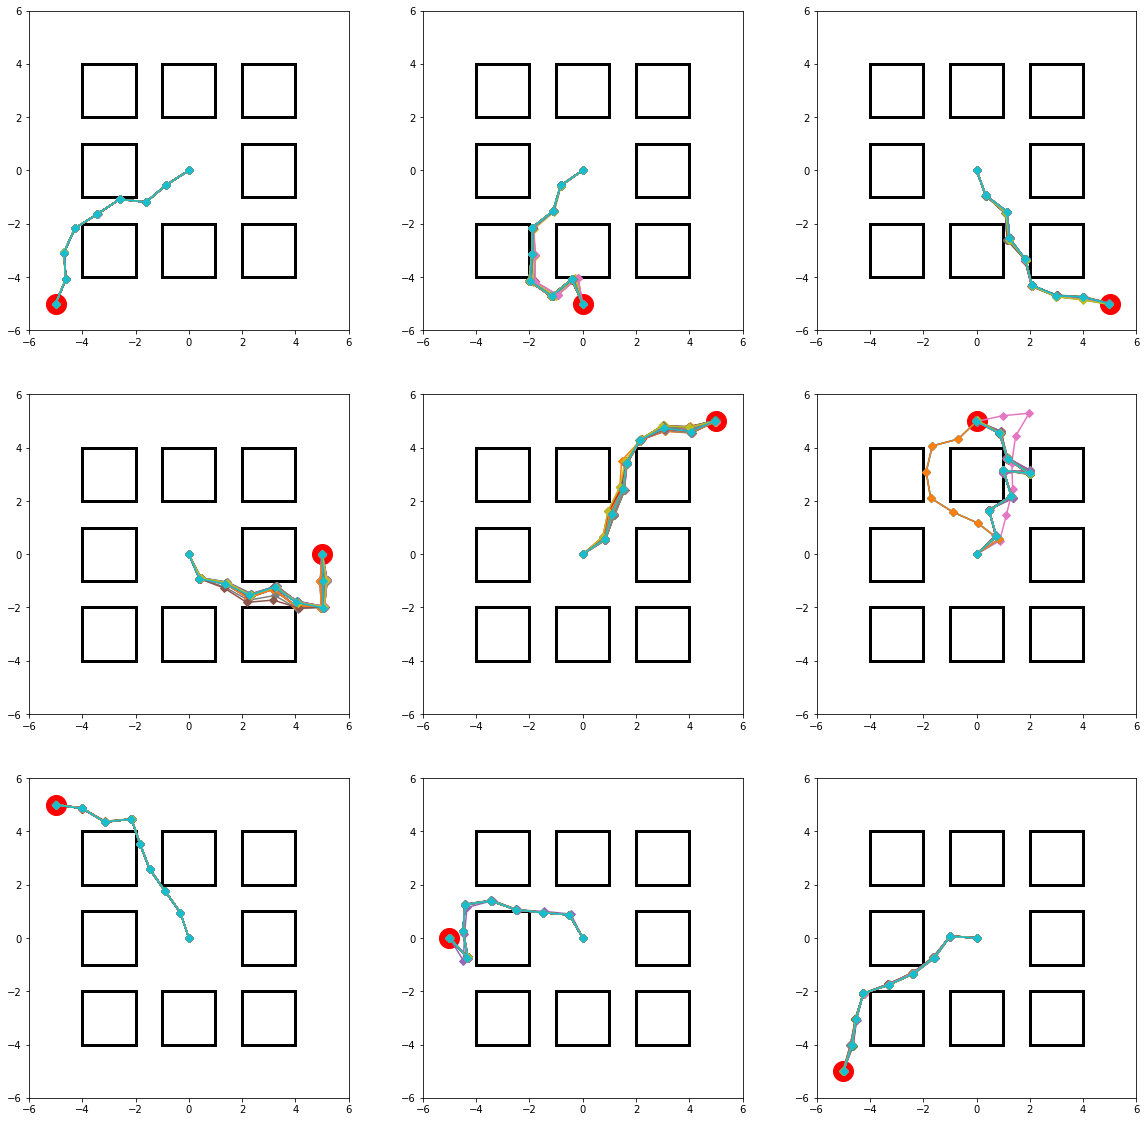

In [4]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20), xlim=(-6, 6), ylim=(-6, 6))

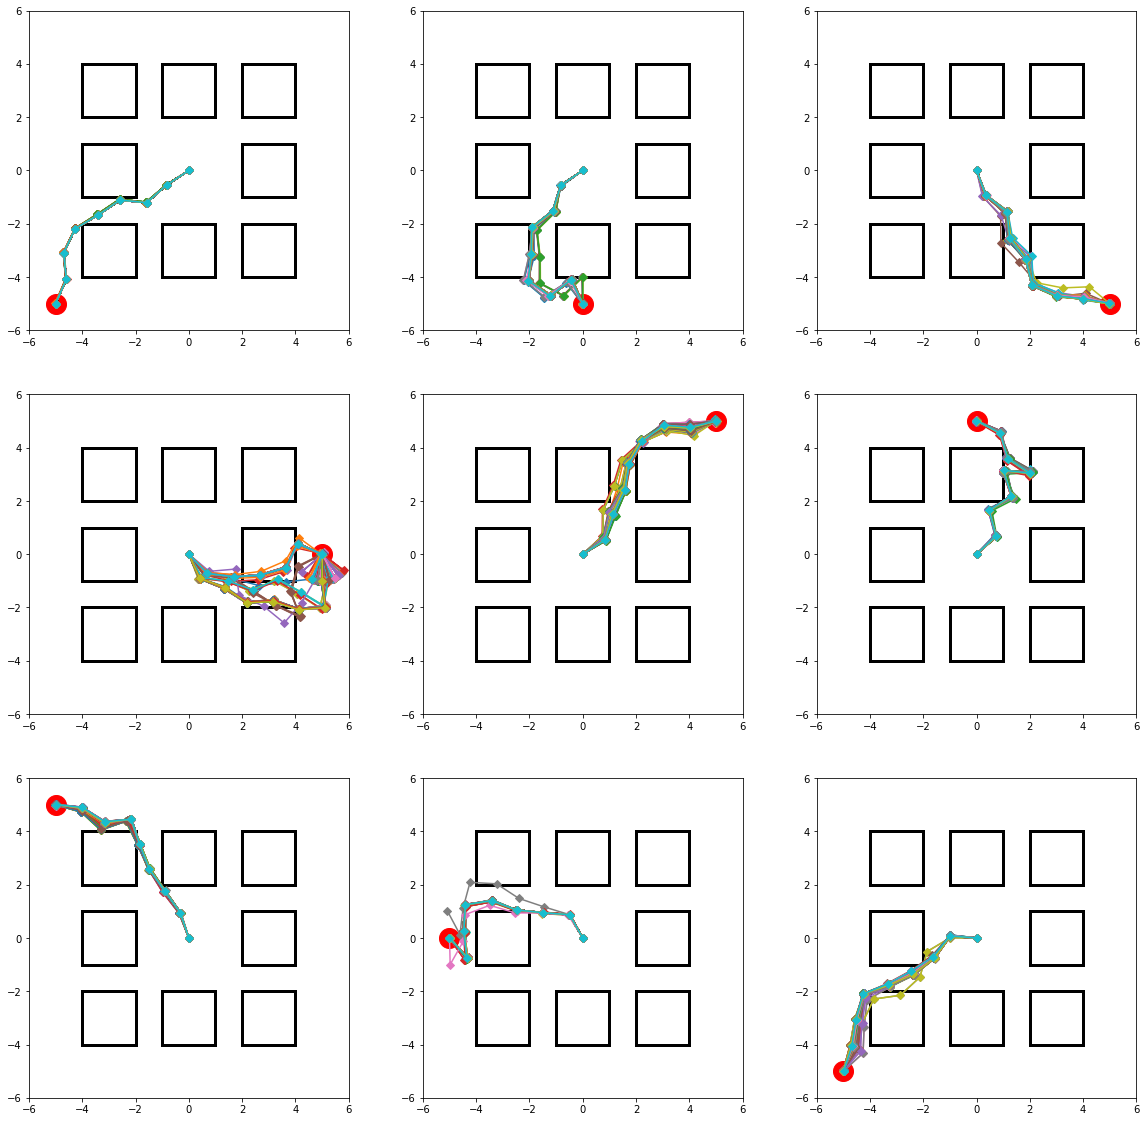

In [5]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20), xlim=(-6, 6), ylim=(-6, 6))

In [6]:
random_state("rng_states/experiment2.npy")

In [7]:
S = [1.] * 8
d = len(S)
x_min = -np.pi
x_max = np.pi

targets = [(-5, -5), (0, -5), (5, -5), (5, 0), (5, 5), (0, 5), (-5, 5), (-5, 0), (-5, -5)]
T = len(targets)
rectangles = [((-4, -4), (-2, -2)), ((-1, -4), (1, -2)), ((2, -4), (4, -2)),
              ((-4, -1), (-2, 1)), ((2, -1), (4, 1)),
              ((-4, 2), (-2, 4)), ((-1, 2), (1, 4)), ((2, 2), (4, 4))]
rectangle_lists = [rectangles] * T

objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 400
alpha_inf = 0.8
n_immigrants = 200
eta_c = 3.
eta_m = 30.
p_c = 0.9
p_m = 0.25
p_m_mult = np.power(0.05/p_m, 1/(d-1))
num_iterations_init = 120
num_iterations = 80

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 80, best: [4.67567324], #infeasible: 320, best: [2.26572692 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 80, best: [0.14885455], #infeasible: 320, best: [2.07895677e-04 1.00000000e+00]
Iteration 40, #feasible: 80, best: [0.00193241], #infeasible: 320, best: [7.40602703e-05 1.00000000e+00]
Iteration 60, #feasible: 80, best: [0.00082821], #infeasible: 320, best: [2.61192774e-05 1.00000000e+00]
Iteration 80, #feasible: 80, best: [9.3081058e-05], #infeasible: 320, best: [5.07801945e-06 1.00000000e+00]
Iteration 100, #feasible: 80, best: [5.63893862e-05], #infeasible: 320, best: [5.07801945e-06 1.00000000e+00]
Iteration 119, #feasible: 80, best: [3.28074355e-05], #infeasible: 320, best: [5.07801945e-06 1.00000000e+00]
t=1
Iteration 0, #feasible: 80, best: [1.69077363], #infeasible: 320, best: [0.02422916 1.        ]
Iteration 20, #feasible: 80, best: [0.00018476], #infeasible: 320, best: [1.58684149e-04 1.00000000e+00]
Iteration 40, #feasible: 80, best: [0.00018476], #infeasible: 320, best: [7.13917176e-05 1.00000000e+00]
Iteration 60, #feasible: 80, best: [0.00018476]

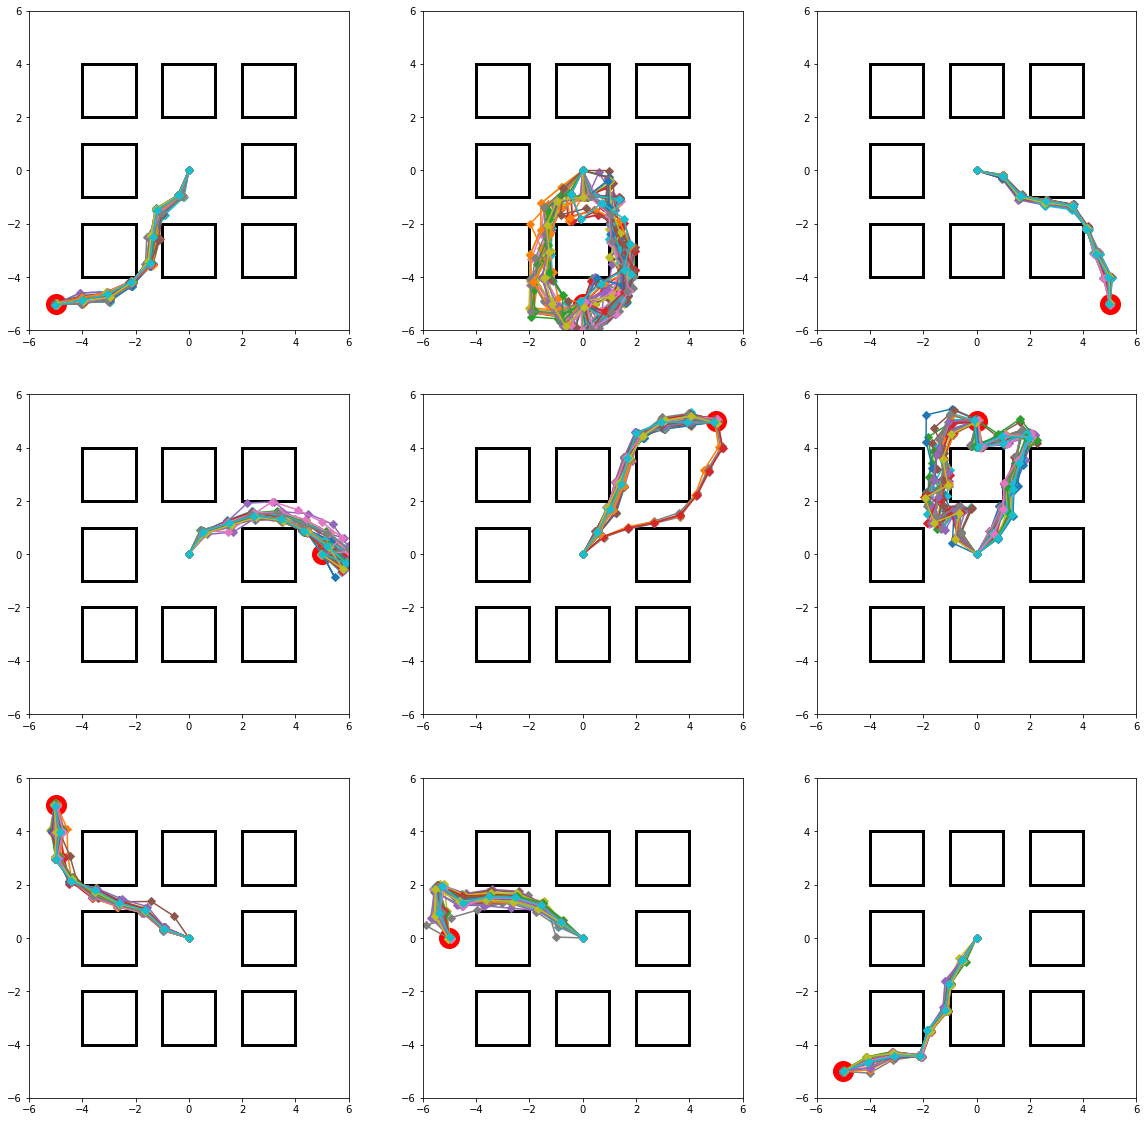

In [8]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20), xlim=(-6, 6), ylim=(-6, 6))

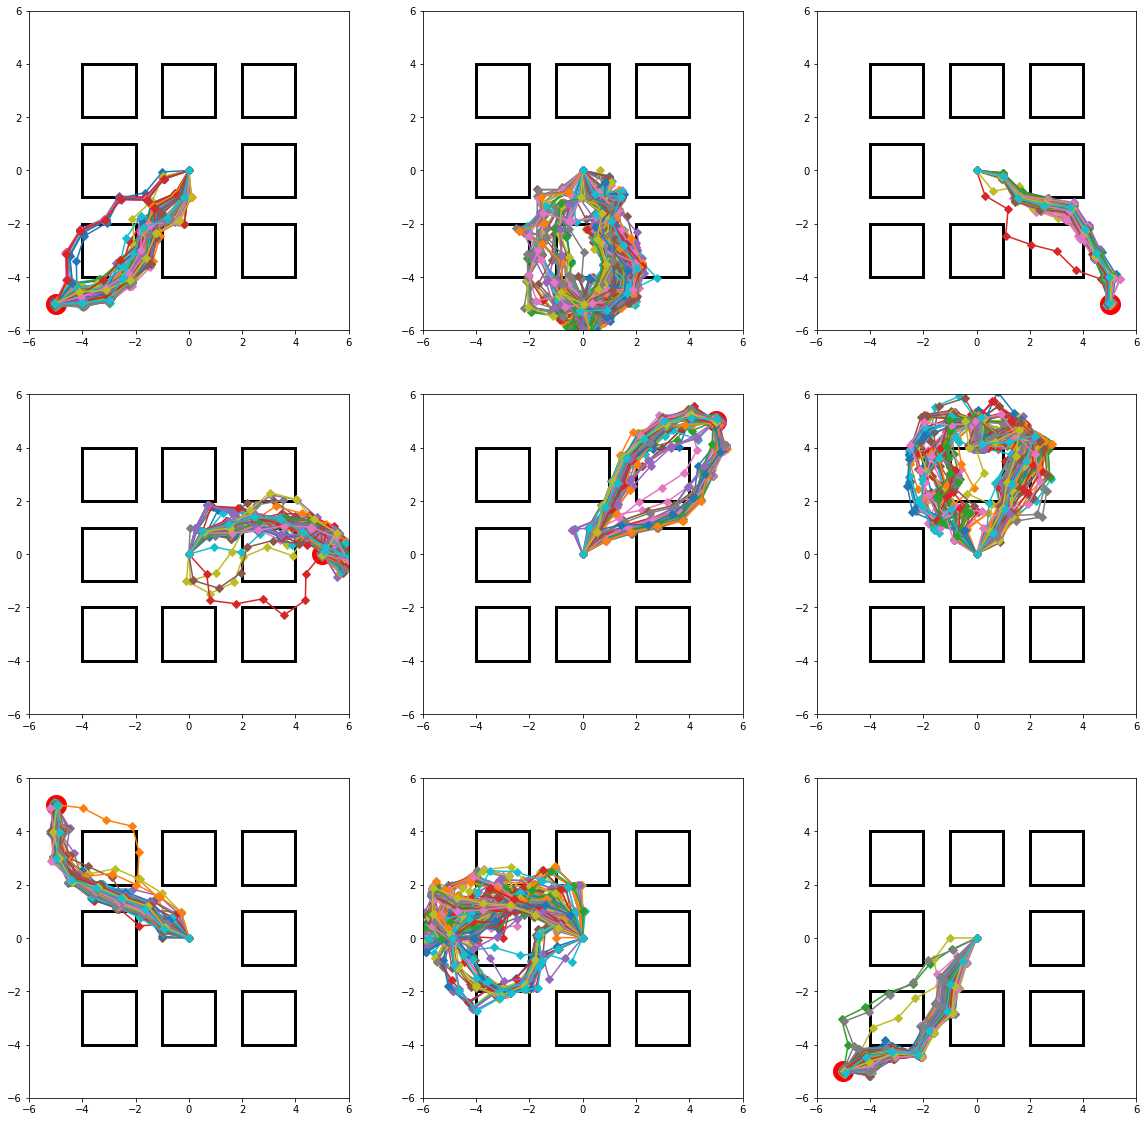

In [9]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20), xlim=(-6, 6), ylim=(-6, 6))